# Dataset Selection
We have to make sure our model is trained and validated in a way which is focused on acquiring high performance on the March LoadFactor predictions.
<br>
To ensure this, we have to make sure the distribution of our training, validaiton, and test datasets match that of the Future Schedule dataset.

In [30]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

## Global Parameters

In [35]:
REALIZED_DATA_PATH = 'Realized Schedule 20210101-20220228.xlsx'
FUTURE_DATA_PATH = 'Future Schedule 20220301-20220331.xlsx'

In [36]:
realized = pd.read_excel(REALIZED_DATA_PATH)
future = pd.read_excel(FUTURE_DATA_PATH)

We first check if the columns are equal

In [37]:
(realized.columns[:-1] == future.columns).all()

True

In [38]:
future.columns

Index(['ScheduleTime', 'Airline', 'FlightNumber', 'Destination',
       'AircraftType', 'FlightType', 'Sector', 'SeatCapacity'],
      dtype='object')

100%|██████████| 7/7 [00:04<00:00,  1.58it/s]


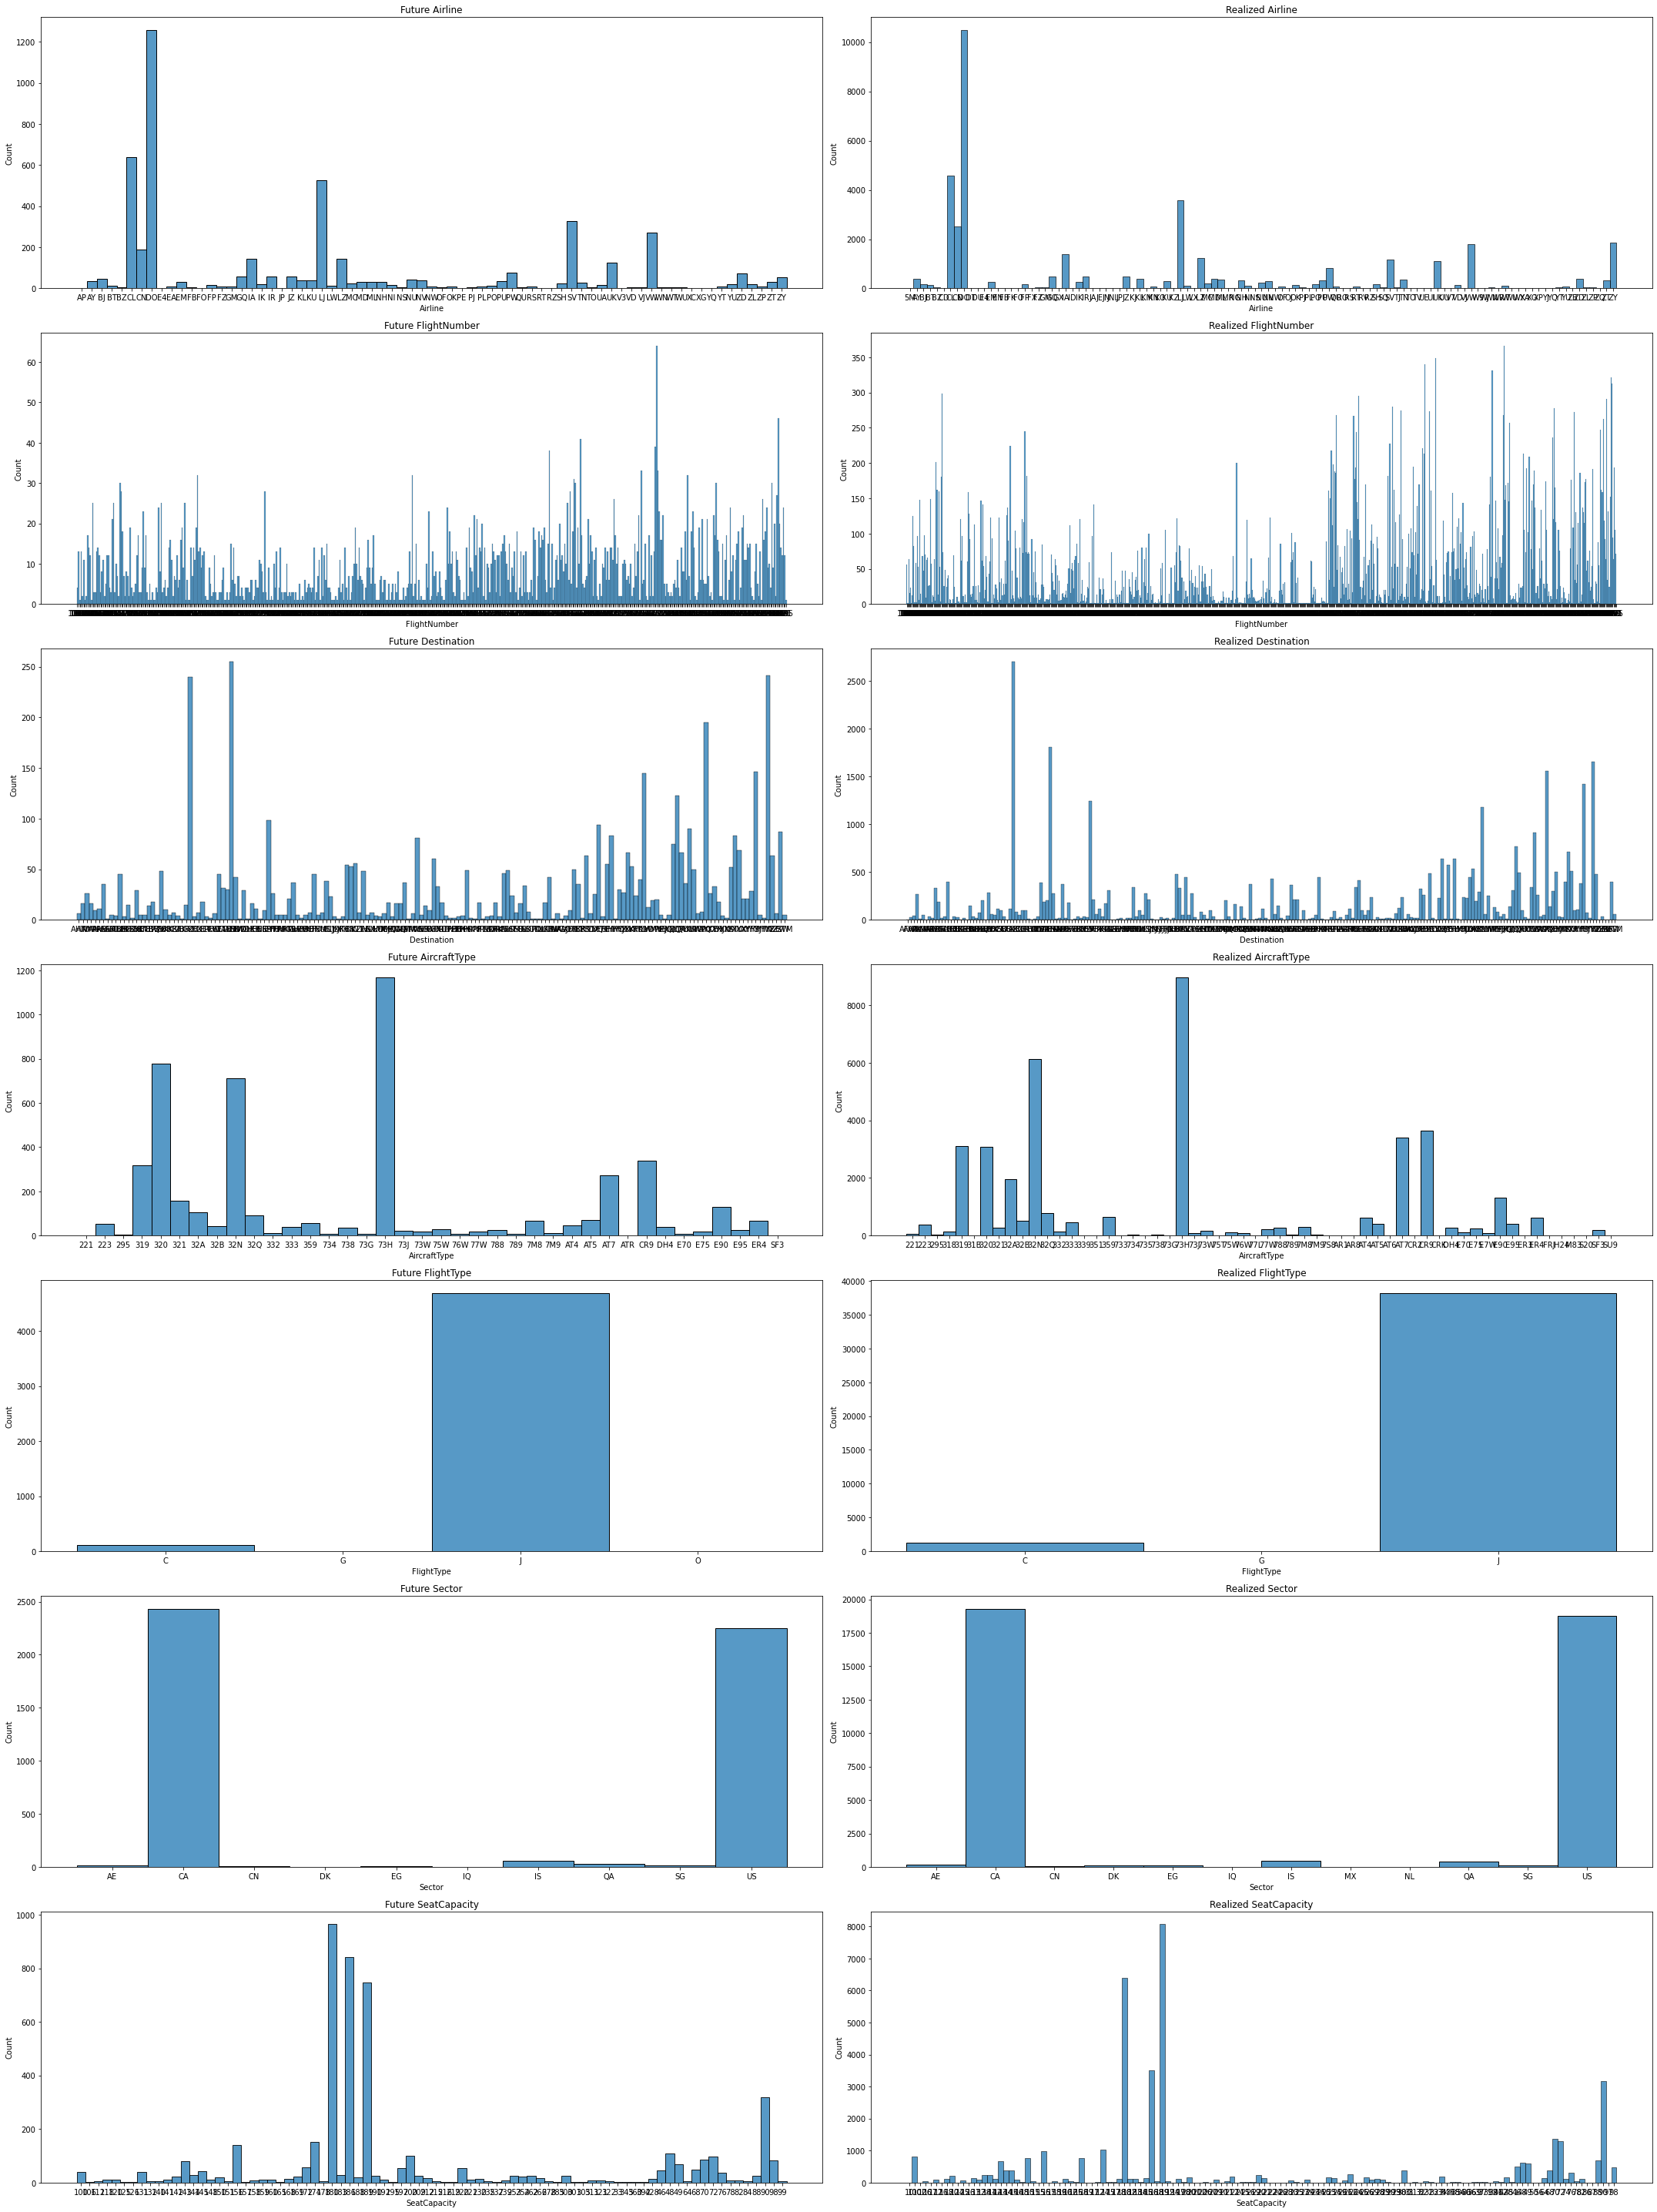

In [44]:
f_id = 0
features = future.columns.tolist()[1:]

r = len(features)
c = 2

fig, ax = plt.subplots(r, c, figsize=(30, 40))

for row in tqdm(range(r)):
    feature = features[f_id]
    ax[row,0].set_title(f'Future {feature}')
    sns.histplot(future[feature].astype(str).sort_values(), ax=ax[row,0])
    ax[row,1].set_title(f'Realized {feature}')
    sns.histplot(realized[feature].astype(str).sort_values(), ax=ax[row,1])
    f_id += 1


plt.tight_layout()
plt.show()

Idea is to do the following:
1. Run a time window over data with the size of the Future data (i.e. time from min to max Future ScheduleTime)
2. 

In [45]:
realized['ScheduleTime'].max() - realized['ScheduleTime'].min()

Timedelta('423 days 17:25:00')

In [50]:
future['ScheduleTime'].max() - future['ScheduleTime'].min()

Timedelta('30 days 17:20:00')